In [15]:
import os

import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf

from dataset_preprocess import preprocess_data, split_dataset

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


In [27]:
def evaluate_model(model, X_test, y_test):
    # 预测标签
    y_preds = model.predict(X_test)

    # 将预测标签转换为二进制形式
    y_preds = np.where(y_preds > 0.5, 1, 0)
    y_preds = np.squeeze(y_preds, axis=-1)
    # 计算准确率、 计算精确率、召回率和F1分数

    accuracy = accuracy_score(y_test.flatten(), y_preds.flatten())
    precision = precision_score(y_test.flatten(), y_preds.flatten())
    recall = recall_score(y_test.flatten(), y_preds.flatten())
    f1 = f1_score(y_test.flatten(), y_preds.flatten())

    # 输出评估结果
    print("Accuracy:\t\t{:.4f}".format(accuracy))
    print("Precision:\t\t{:.4f}".format(precision))
    print("Recall:\t\t{:.4f}".format(recall))
    print("F1 Score:\t\t{:.4f}".format(f1))

    # 可视化预测结果
    n_samples = 5
    sample_indices = np.random.choice(len(X_test), size=n_samples, replace=False)

    for i, sample_index in enumerate(sample_indices):
        # 获取样本图像和真实标签
        sample_image = X_test[sample_index]
        true_label = y_test[sample_index].astype(np.uint8)
        pred_label = y_preds[sample_index].astype(np.uint8)

        print(sample_image.shape, sample_image.dtype)
        print(true_label.shape, true_label.dtype)
        print(pred_label.shape, pred_label.dtype)
        print('')

        # 可视化图像和标签
        plt.subplot(3, n_samples, i + 5 * 0 + 1)
        plt.imshow(sample_image)
        plt.title("image")
        plt.axis("off")  # 取消坐标轴
        plt.subplot(3, n_samples, i + 5 * 1 + 1)
        plt.imshow(cv2.bitwise_and(sample_image, sample_image, mask=true_label))
        plt.title("true")
        plt.axis("off")  # 取消坐标轴
        plt.subplot(3, n_samples, i + 5 * 2 + 1)
        plt.imshow(cv2.bitwise_and(sample_image, sample_image, mask=pred_label))
        plt.title("pred")
        plt.axis("off")  # 取消坐标轴
    # plt.tight_layout()
    plt.show()

In [17]:

data_path = 'datasets/label-studio'
image_folder = 'Images'
mask_folder = 'Annotations'
model_path = "saved_models/gunet.h5"
image_size = (512, 512)
validation_split = 0.2

# 假设你已经训练好了模型，并加载了测试集的数据
model = tf.keras.models.load_model(model_path)

images_path = os.path.join(data_path, image_folder)
annotations_path = os.path.join(data_path, mask_folder)
data = preprocess_data(images_path, annotations_path, image_size)
# 划分训练集和验证集
X_train, X_test, y_train, y_test = split_dataset(data, test_size=validation_split, random_state=42)


3/3 [==============================] - 0s 191ms/step
Accuracy:		0.9934
Precision:		0.8802
Recall:		0.8402
F1 Score:		0.8598
(512, 512, 3) uint8
(512, 512) uint8
(512, 512) uint8

(512, 512, 3) uint8
(512, 512) uint8
(512, 512) uint8

(512, 512, 3) uint8
(512, 512) uint8
(512, 512) uint8

(512, 512, 3) uint8
(512, 512) uint8
(512, 512) uint8

(512, 512, 3) uint8
(512, 512) uint8
(512, 512) uint8



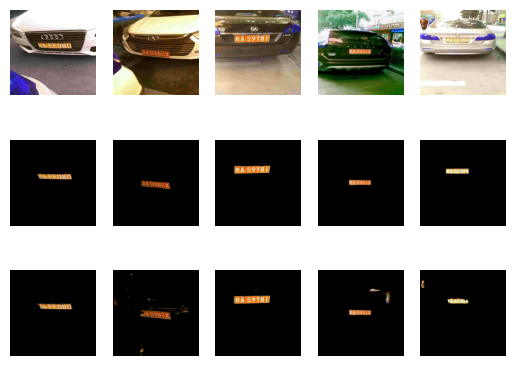

In [28]:
# 评估模型
evaluate_model(model, X_test, y_test)